# Introduction

This notebook shows how to set-up a working python envirnoment for the Machine Learning Practical course.


# Setting up the software

Within this course we are going to work with python (using some auxiliary libraries like numpy and scipy). Depending on the infrastracture and working environment (e.g. DICE), root permission may not be not available so the packages cannot be installed in default locations. A convenient python configuration, which allows us to install and update third party libraries easily using package manager, are so called virtual environments. They can be also used to work (and test) the code with different versions of software.

## Instructions for Windows

The fastest way to get working setup on Windows is to install Anaconda (http://www.continuum.io) package. It's a python environment with precompiled versions of the most popular scientific python libraries. It also works on MacOS, but numpy is not linked without a fee to a numerical library, hence for MacOS we recommend the following procedure.

## Instructions for MacOS

  * Install macports following instructions at https://www.macports.org/install.php
  * Install the relevant python packages in macports

  ```
  sudo port install py27-scipy +openblas
  sudo port install py27-ipython +notebook
  sudo port install py27-notebook
  sudo port install py27-matplotlib
  sudo port select --set python python27
  sudo port select --set ipython2 py27-ipython
  sudo port select --set ipython py27-ipython
  ```

Make sure that your `$PATH` has `/opt/local/bin` before `/usr/bin` so you pick up the version of python you just installed.

## Instructions for DICE:

### Directory structure and getting things organised

To get things somehow standarized between people, and make life of everyone easier, we propse to organise your DICE setup in the following directory structure:

  * `~/mlpractical/` -- for a general course repository
  * `~/mlpractical/repos-3rd` -- for stuff you download, build and install (numpy, OpenBlas, virtualenv)
  * `~/mlpractical/repo-mlp` -- this is the actual course repository you clone from our website (do not create a dir for it yet!)
  * `~/mlpractical/venv` -- this is where virutal envirnoment will make its dir (do not create a dir for it yet!)

Create now repos-3rd directory (option -p in the below command will automatically create (non-existing) **p**arent directories (mlpractical):

  * `mkdir -p ~/mlpractical/repos-3rd`

And now, let us set an MLP_WDIR environmental variable (MLP Working DIRectory) that will keep an absolute path of working dir pointing to `~/mlpractial`, **add the below line** to your `~/.bashrc` file (if it does not exists, create one using a text editor! e.g. by running `gedit ~/.bashrc`):

```
export MLP_WDIR=~/mlpractical
```

Now re-source `~/.bashrc` by typing (so the env variables get updated!): `source ~/.bashrc`

Enter the `repos-3rd` directory by typing: `cd ~/mlpractical/repos-3rd`  (or  ```cd $MLP_WDIR/repos-3rd``` if you want)

### Configuring virtual environment

Make sure you are in `repos-3rd` directory and that MLP_WDIR variable has been exported (you may type export in the terminal and examine the list of availabe variables in the current session), then type:

  * `git clone https://github.com/pypa/virtualenv`
  * Enter the cloned repository and type ```./virtualenv.py --python /usr/bin/python2.7 --no-site-packages $MLP_WDIR/venv```
  * Activate the environment by typing `source ~/mlpractical/venv/bin/activate` (to leave the virtual environment one may type `decativate`)
  * Environments need to be activated every time ones start the new session so we will now create a handy alias to it in `~/.bashrc` script, by typing the below command (note, MLP_WDIR export needs to preceed this command):
  
  ```alias activate_mlp="source $MLP_WDIR/venv/bin/activate"```
  
Then every time you open new session and want to activate the right virtual environment, simply type `activate_mlp` instead `source ~/mlpractical/venv/bin/activate`. Note, you need to re-soure the .bashrc in order alias to be visible in the current session.

### Installing remaining packages

Then, before you follow next, install/upgrade the following packages:

```
pip install --upgrade pip
pip install setuptools
pip install setuptools --upgrade
pip install ipython
pip install notebook
```

### Installing numpy

Note, having virtual environment properly installed one may then run `pip install numpy` to use pip to install numpy, though this will most likely lead to the suboptimal configuration where numpy is linked to ATLAS numerical library, which on DICE is compiled in multi-threaded mode. This means whenever numpy use BLAS accelerated computations (using ATLAS), it will use **all** the available cores at the given machine. This happens because ATLAS can be compiled to either run computations in single *or* multi threaded modes. However, contrary to some other backends, the latter does not allow to use an arbitrary number of threads (specified by the user prior to computation). This is highly suboptimal, as the potential speed-up resulting from paralleism depends on many factors like the communication overhead between threads, the size of the problem, etc. Using all cores for our exercises is not-necessary.

For which reason, we are going to compile our own version of BLAS package, called *OpenBlas*. It allows to specify the number of threads manually by setting an environmental variable OMP_NUM_THREADS=N, where N is a desired number of parallel threads (please use 1 by default). You can set an environment variable in the current shell by running

```
export OMP_NUM_THREADS=1
```

(note the lack of spaces around the equals sign and use of `export` to define an environment variable which will be available in sub-shells rather than just a variable local to the current shell).

#### OpenBlas

Enter again repos-3rd directory and copy into terminal the following commands (one at the time):

```
cd ~/mlpractical/repos-3rd
OBDir=$MLP_WDIR/repos-3rd/OpenBLAS
git clone git://github.com/xianyi/OpenBLAS
cd OpenBLAS
make
make PREFIX=$OBDir install
```

Once OpenBLAS is finished compiling we need to ensure the compiled shared library files in the `lib` subdirectory are available to the shared library loader. This can be done by appending the absolute path to the `lib` subdirectory to the `LD_LIBRARY_PATH` environment variable. To ensure this changes persist we will change the bash start up file `~/.bashrc` by opening it in a text editor (e.g. by running `gedit ~/.bashrc`) and adding the following line

```
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$MLP_WDIR/repos-3rd/OpenBLAS/lib
```

Note, we again are using MLP_WDIR here, so the above line needs to be placed after you set MLP_WDIR.

After you have edited `.bashrc` run

```
source ~/.bashrc
activate_mlp  # This is the alias you set up in the bashrc
#source ~/mlpractical/venv/bin/activate
```

to rerun the bash start up script make sure the new environment variable is available in the current shell and then reactivate the virtual environment.

#### Numpy

To install `numpy` linked against the OpenBLAS libraries we just compiled, first run the following commands (one at a time)

```
cd ~/mlpractical/repos-3rd/
wget http://downloads.sourceforge.net/project/numpy/NumPy/1.9.2/numpy-1.9.2.zip
unzip numpy-1.9.2.zip
cd numpy-1.9.2
echo "[openblas]" >> site.cfg
echo "library_dirs = $OBDir/lib" >> site.cfg
echo "include_dirs = $OBDir/include" >> site.cfg
python setup.py build --fcompiler=gnu95
```

Assuming the virtual environment is activated, the below command will install numpy in a desired space (`~/mlpractical/venv/...`):

```
python setup.py install
```

Now use pip to install remaining packages: `scipy`, `matplotlib`, `argparse`, and `nose` by executing:

```
pip install scipy matplotlib argparse nose
```

### Getting the mlpractical repository

Clone the course repository from the github, by navigating to `~/mlpractical` directory and typing:

```
cd $MLP_WDIR
git clone https://github.com/CSTR-Edinburgh/mlpractical.git repo-mlp
```

When download is ready, enter the repo-mlp directory and start the actual interactive notebook session by typing:

```
cd repo-mlp
ipython notebook
```

This should start a ipython server which opens a new browser window listing files in `repo-mlp` directory, including `00_Introduction.ipynb.`. Open it and run (from the browser interface) the following examples and exercies.

In [1]:
%qtconsole

/Users/kungfujam/anaconda/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
%clear
import numpy
# show_config() prints the configuration of numpy numerical backend 
# you should be able to see linkage to OpenBlas or some other library
# in case those are empty, it means something went wrong and 
# numpy will use a default (slow) pythonic implementation for algebra
numpy.show_config()
#numpy.test()

lapack_opt_info:
    libraries = ['mkl_lapack95_lp64', 'mkl_intel_lp64', 'mkl_intel_thread', 'mkl_core', 'iomp5', 'pthread']
    library_dirs = ['/Users/kungfujam/anaconda/lib']
    define_macros = [('SCIPY_MKL_H', None)]
    include_dirs = ['/Users/kungfujam/anaconda/include']
blas_opt_info:
    libraries = ['mkl_intel_lp64', 'mkl_intel_thread', 'mkl_core', 'iomp5', 'pthread']
    library_dirs = ['/Users/kungfujam/anaconda/lib']
    define_macros = [('SCIPY_MKL_H', None)]
    include_dirs = ['/Users/kungfujam/anaconda/include']
openblas_lapack_info:
  NOT AVAILABLE
lapack_mkl_info:
    libraries = ['mkl_lapack95_lp64', 'mkl_intel_lp64', 'mkl_intel_thread', 'mkl_core', 'iomp5', 'pthread']
    library_dirs = ['/Users/kungfujam/anaconda/lib']
    define_macros = [('SCIPY_MKL_H', None)]
    include_dirs = ['/Users/kungfujam/anaconda/include']
blas_mkl_info:
    libraries = ['mkl_intel_lp64', 'mkl_intel_thread', 'mkl_core', 'iomp5', 'pthread']
    library_dirs = ['/Users/kungfujam/anaconda

Also, below we check whether and how much speedup one may expect by using different number of cores:

In [3]:
import os
import multiprocessing
import timeit

num_cores = multiprocessing.cpu_count()
N = 1000
x = numpy.random.random((N,N))

for i in xrange(0, num_cores):
    # first, set the number of threads OpenBLAS
    # should use, the below line is equivalent
    # to typing export OMP_NUM_THREADS=i+1 in bash shell
    print 'Running matrix-matrix product on %i core(s)' % i
    os.environ['OMP_NUM_THREADS'] = str(i+1)
    %%timeit numpy.dot(x,x.T)

Running matrix-matrix product on 0 core(s)
10 loops, best of 3: 90.5 ms per loop
Running matrix-matrix product on 1 core(s)
10 loops, best of 3: 86.7 ms per loop
Running matrix-matrix product on 2 core(s)
10 loops, best of 3: 87.9 ms per loop
Running matrix-matrix product on 3 core(s)
10 loops, best of 3: 86.5 ms per loop


Test whether you can plot and display the figures using pyplot

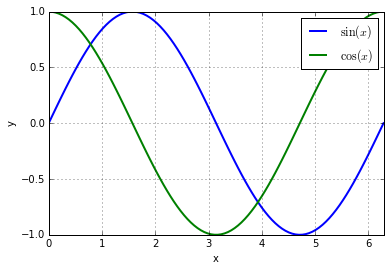

In [4]:
# Remove the below line if not running this code in an ipython notebook
# It's a special command allowing the notebook to display plots inline
%matplotlib inline
import matplotlib.pyplot as plt

x = numpy.linspace(0.0, 2*numpy.pi, 100)
y1 = numpy.sin(x)
y2 = numpy.cos(x)

plt.plot(x, y1, lw=2, label=r'$\sin(x)$')
plt.plot(x, y2, lw=2, label=r'$\cos(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0.0, 2*numpy.pi)
plt.grid()
plt.show()

# Exercises

Today exercises are meant to get you familiar with ipython notebooks (if you haven't used them so far), data organisation and how to access it. Next week onwars, we will follow with the material covered in lectures.

## Data providers

Open (in the browser) `mlp.dataset` module (go to `Home` tab and navigate to mlp package, then click on the link `dataset.py`). Have a look thourgh the code and comments, then follow to exercises.

<b>General note:</b> you can load the mlp code into your favourite python IDE but it is totally OK if you work (modify & save) the code directly in the browser by opening/modyfing the necessary modules in the tabs.

### Exercise 1 

Using MNISTDataProvider, write a code that iterates over the first 5 minibatches of size 100 data-points. Print MNIST digits in 10x10 images grid plot. Images are returned from the provider as tuples of numpy arrays `(features, targets)`. The `features` matrix has shape BxD while the `targets` vector is of size B, where B is the size of a mini-batch and D is dimensionality of the features. By deafult, each data-point (image) is stored in a 784 dimensional vector of pixel intensities normalised to [0,1] range from an inital integer values [0-255]. However, the original spatial domain is two dimensional, so before plotting you need to convert it into 2D matrix (MNIST images have the same number of pixels for height and width).

Tip: Useful functions for this exercise are: imshow, subplot, gridspec

In [56]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from mlp.dataset import MNISTDataProvider

def show_mnist_image(img):
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 1)
    ax1 = fig.add_subplot(gs[0,0])
    ax1.imshow(img, cmap=cm.Greys_r)
    plt.show()

def show_mnist_images(batch):
    feats, tar = batch
    fig = plt.figure()
    fif, axarr = plt.subplots(10, 10)
    for i in xrange(0,10):
        for j in xrange(0,10):
            k = i*10 + j
            ax = axarr[i,j]
            ax.imshow(feats[k].reshape(28,28), cmap=cm.Greys_r)
#             ax.axes.get_xaxis().set_ticks([])
#             ax.axes.get_yaxis().set_ticks([])
#             ax.set_xlabel('yes', color='blue')
            ax.tick_params(
                axis='both',       
                which='both',      
                bottom='off',      
                top='off',
                left='off',
                right='off',
                labelbottom='off',
                labeltop='off',
                labelleft='off',
                labelright='off')
            ax.set_aspect('equal')
            ax.set_xlabel("%d" % (np.arange(10)[tar[k]==1]), color='blue')
    fif.set_size_inches(10, 10)
    plt.tight_layout()
    plt.show()

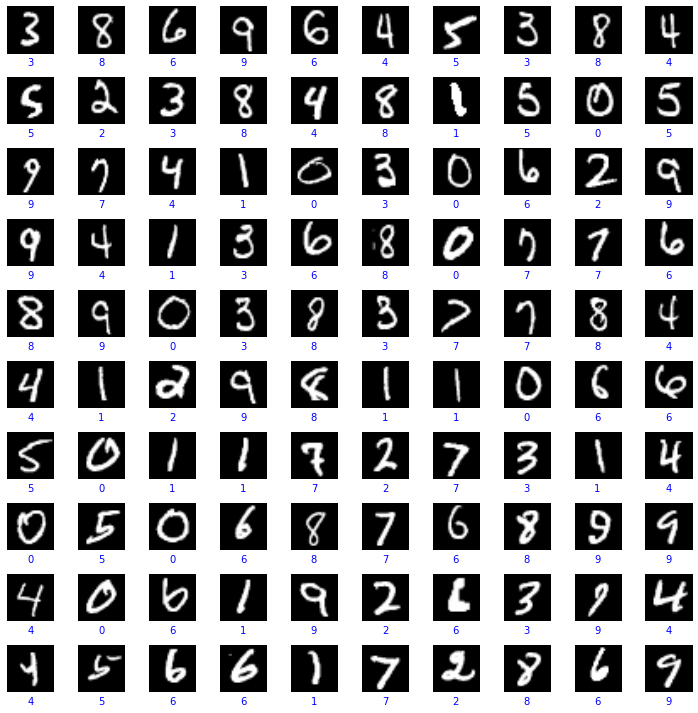

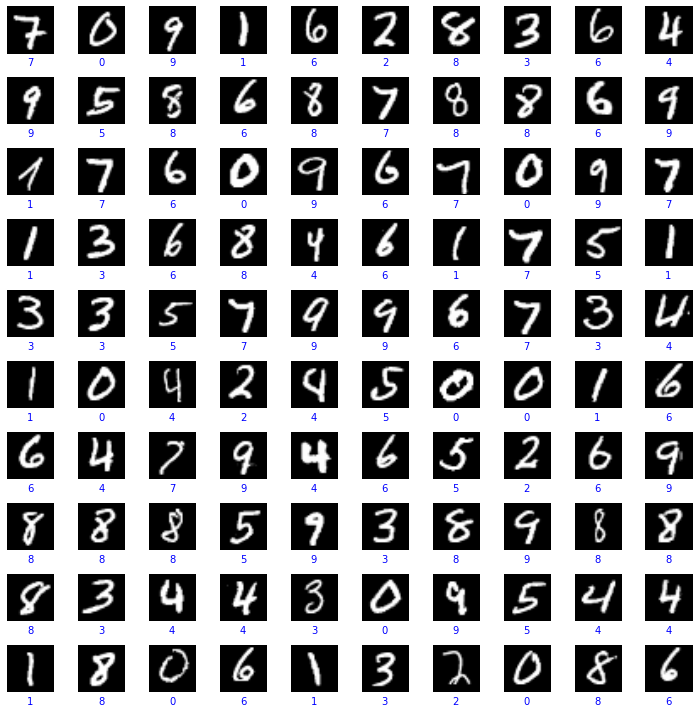

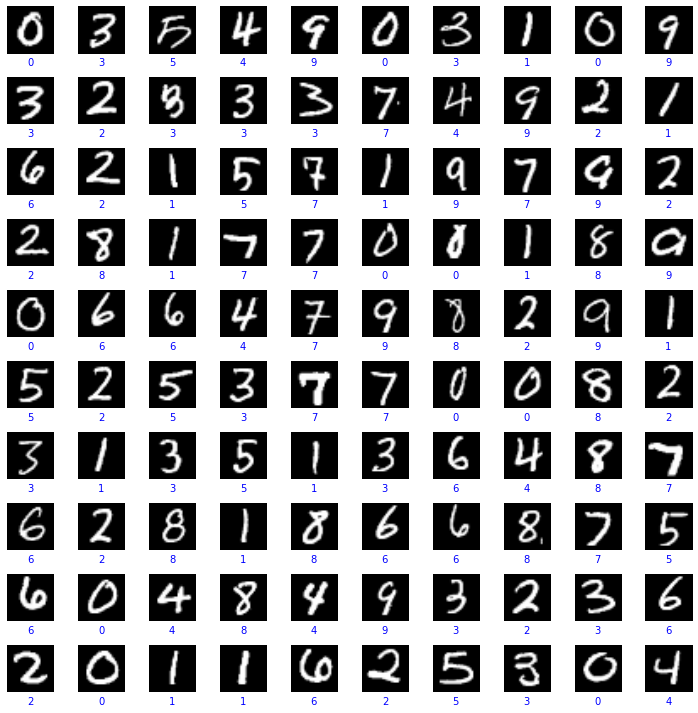

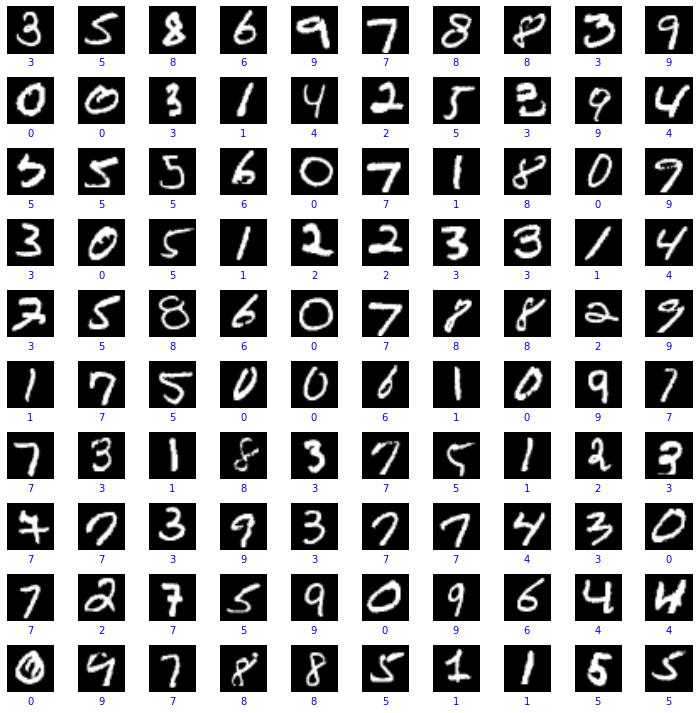

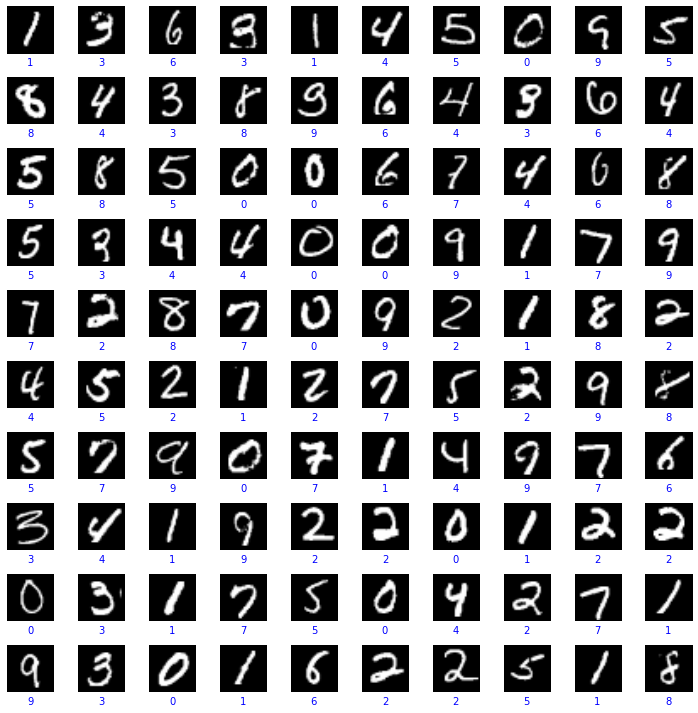

In [57]:
# An example for a single MNIST image (commented)
# mnist_dp = MNISTDataProvider(dset='valid', batch_size=1, max_num_examples=2, randomize=False)
mnist_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=5, randomize=False)

for batch in mnist_dp:
#     features, targets = batch
#     show_mnist_image(features.reshape(28, 28))
    show_mnist_images(batch)

### Exercise 2

`MNISTDataProvider` as `targets` currently returns a vector of integers, each element in this vector represents an id of the category `features` data-point represent. Later in the course we are going to need 1-of-K representation of targets, for instance, given the minibatch of size 3 and the corresponding targets vector $[2, 2, 0]$ (and assuming there are only 3 different classes to discriminate between), one needs to convert it into matrix $\left[ \begin{array}{ccc}
0 & 0 & 1 \\
0 & 0 & 1 \\
1 & 0 & 0 \end{array} \right]$. 

Implement `__to_one_of_k` method of `MNISTDataProvider` class. Then modify (uncomment) an appropriate line in its `next` method, so the raw targets get converted to `1 of K` coding. Test the code in the cell below.

In [ ]:
#implement here Exercise 1

### Exercise 3

Write your own data provider `MetOfficeDataProvider` that wraps the weather data for south Scotland (could be obtained from: http://www.metoffice.gov.uk/hadobs/hadukp/data/daily/HadSSP_daily_qc.txt). The file was also downloaded and stored in `data` directory for your convenience. The provider should return a tuple `(x,t)` of the estimates over an arbitrary time windows (i.e. last N-1 days) for `x` and the N-th day as the one which model should be able to predict, `t`. For now, skip missing data-points (denoted by -99.9) and simply use the next correct value. Make sure the provider works for arbitrary `batch_size` settings, including the case where single mini-batch is equal to all datapoints in the dataset. Test the dataset in the cell below.

Tip: To follow with this exercise, copy MNISTDataProvider in dataset.py, rename it to `MetOfficeDataProvider` and reimplement necesarry parts (including the arguments you pass to the constructor).